In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import sys
import os
import time
print("Libraries imported")

Libraries imported


Shapes of loaded data arrays:
X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


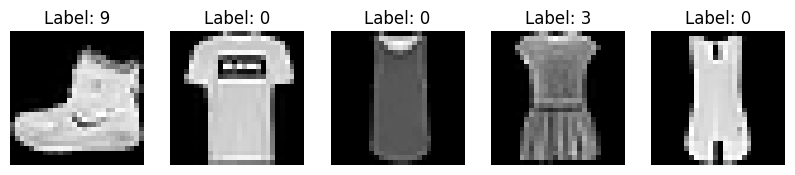

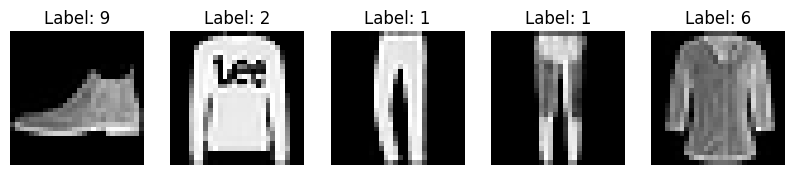

In [16]:
# Get the current working directory
cwd = os.getcwd()

# Construct the path to the 'utils' directory
utils_path = os.path.join(cwd, 'fashion-mnist', 'utils')

# Add the 'utils' directory to sys.path
sys.path.append(utils_path)

#https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#get-the-data

import mnist_reader

# Load the dataset using mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

# Print the shapes of the loaded data arrays
print("Shapes of loaded data arrays:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Reshape images to (n_samples, 28, 28)
X_train = X_train.reshape(-1, 28, 28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28).astype('float32') / 255.0


import matplotlib.pyplot as plt

# Display first few images from X_train along with their corresponding labels from y_train
num_images_to_display = 5
plt.figure(figsize=(10, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Display first few images from X_test along with their corresponding labels from y_test
plt.figure(figsize=(10, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

In [17]:
# Flatten images to use in logistic regression
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)


# Split data into training and validation sets
X_train_flat, X_val_flat, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()  #Make mean 0  and variance 1
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Shape of flattened training images array:", X_train_flat.shape)
print("Shape of flattened validation images array:", X_val_flat.shape)
print("Shape of standardized training images array:", X_train_scaled.shape)
print("Shape of standardized validation images array:", X_val_scaled.shape)
print("Shape of standardized test images array:", X_test_scaled.shape)


Shape of flattened training images array: (48000, 784)
Shape of flattened validation images array: (12000, 784)
Shape of standardized training images array: (48000, 784)
Shape of standardized validation images array: (12000, 784)
Shape of standardized test images array: (10000, 784)


In [18]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca.explained_variance_ratio_
print("Explained Variance Ratio=",pca.explained_variance_ratio_)

Explained Variance Ratio= [2.20907688e-01 1.43878862e-01 5.45507111e-02 5.11029363e-02
 4.06778790e-02 3.01706623e-02 2.75430959e-02 2.31694523e-02
 1.68718770e-02 1.31854434e-02 1.16827944e-02 9.64092929e-03
 9.02377814e-03 8.66910163e-03 7.49742612e-03 7.27261370e-03
 6.65358920e-03 6.30046008e-03 6.20483514e-03 5.82259102e-03
 5.18437801e-03 5.10101626e-03 4.74418188e-03 4.53437539e-03
 4.37149126e-03 4.18016780e-03 3.93898925e-03 3.87359527e-03
 3.77666601e-03 3.72382416e-03 3.54798650e-03 3.50247417e-03
 3.33671947e-03 3.29864444e-03 3.26660019e-03 3.14489752e-03
 3.04714544e-03 2.95461784e-03 2.84108147e-03 2.79282127e-03
 2.72052875e-03 2.65962724e-03 2.55337660e-03 2.52656615e-03
 2.44180835e-03 2.38543283e-03 2.30974075e-03 2.22357106e-03
 2.18826346e-03 2.13517970e-03 2.11525545e-03 2.07329099e-03
 2.05047778e-03 2.02145614e-03 1.98983913e-03 1.95222476e-03
 1.89840770e-03 1.86887418e-03 1.82461354e-03 1.78446632e-03
 1.74701691e-03 1.70813827e-03 1.68826908e-03 1.66699616e-0

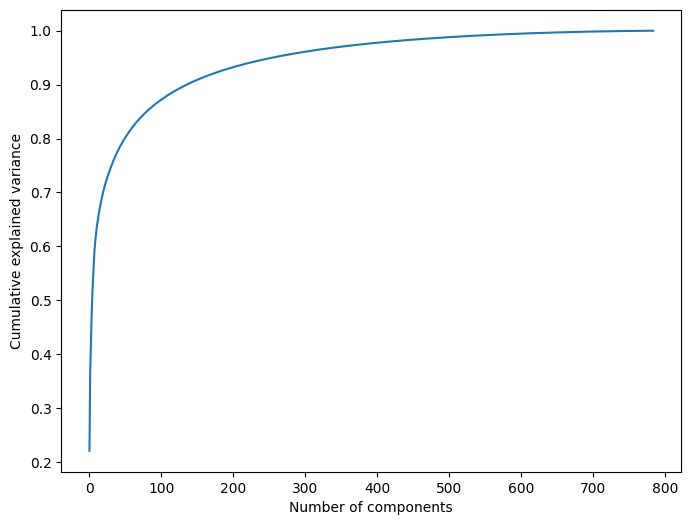

In [20]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [19]:
# Without PCA
print("Training with Softmax Regression (without PCA)...")

# Softmax Regression in scikit-learn, we can simply set the multi_class parameter of LogisticRegression to 'multinomial'
# In scikit-learn, LBFGS is commonly used as the default solver for logistic regression when dealing with multiclass classification problems, especially when using Softmax Regression (multi_class='multinomial'),

start_time = time.time()
model = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')  
model.fit(X_train_scaled, y_train)
end_time = time.time()
train_time_no_pca = end_time - start_time

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy (without PCA):", train_accuracy)
print("Validation Accuracy (without PCA):", val_accuracy)
print("Test Accuracy (without PCA):", test_accuracy)
print("Training Time in second (without PCA):", train_time_no_pca)

Training with Softmax Regression (without PCA)...
Train Accuracy (without PCA): 0.8904791666666667
Validation Accuracy (without PCA): 0.8413333333333334
Test Accuracy (without PCA): 0.8297
Training Time in second (without PCA): 144.84602093696594


Confusion Matrix (without PCA):
 [[794   5  15  59   4   0 105   3  14   1]
 [  3 953   6  25   6   0   4   1   2   0]
 [ 23   9 718  11 133   0  92   1  12   1]
 [ 26  26  24 848  29   1  33   1  11   1]
 [  2   5 109  33 744   3  86   1  17   0]
 [  0   1   0   0   0 913   1  47   8  30]
 [139   3 115  41 113   4 554   1  27   3]
 [  0   0   0   0   0  34   0 937   1  28]
 [ 12   2   8  12   6   8  34   7 908   3]
 [  0   0   0   0   0  23   3  44   2 928]]
F1 Score (without PCA): 0.8286009370595205


<Figure size 1000x600 with 0 Axes>

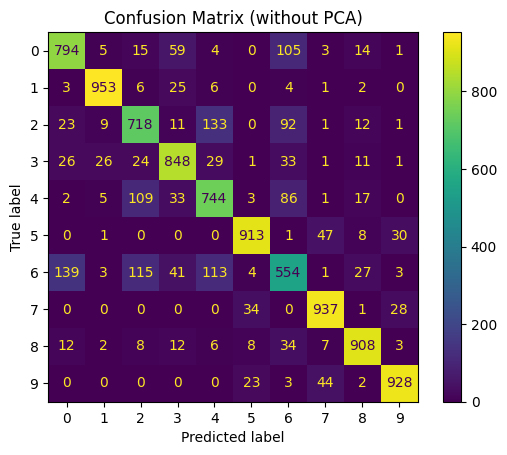

In [21]:
# Model Evaluation
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (without PCA):\n", conf_matrix)

# F1 Score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score (without PCA):", f1)


# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix (without PCA)')
plt.show()

Total Explained Variance (50 components): 0.8000701


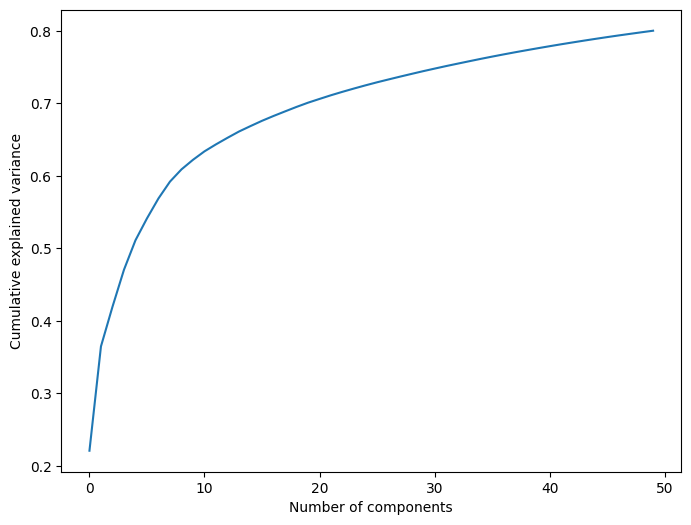

In [22]:
# With PCA (Reducing to 50 components)
pca = PCA(n_components=50)

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate total explained variance for the first 50 components
total_explained_variance = np.sum(pca.explained_variance_ratio_)
print("Total Explained Variance (50 components):", total_explained_variance)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [23]:
print("\nTraining with Softmax Regression and PCA (50 components)...")

start_time = time.time()
model = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')  
model.fit(X_train_pca, y_train)
end_time = time.time()
train_time_with_pca = end_time - start_time

y_train_pred = model.predict(X_train_pca)
y_val_pred = model.predict(X_val_pca)
y_test_pred = model.predict(X_test_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy (with PCA):", train_accuracy)
print("Validation Accuracy (with PCA):", val_accuracy)
print("Test Accuracy (with PCA):", test_accuracy)
print("Training Time in second (with PCA):", train_time_with_pca)


Training with Softmax Regression and PCA (50 components)...
Train Accuracy (with PCA): 0.8393333333333334
Validation Accuracy (with PCA): 0.8349166666666666
Test Accuracy (with PCA): 0.8236
Training Time in second (with PCA): 39.278974533081055


Confusion Matrix (with PCA):
 [[797   2  13  70   5   4  99   0  10   0]
 [  1 951   5  32   6   0   2   1   2   0]
 [ 18   5 676  13 156   1 119   0  12   0]
 [ 33  15   5 850  34   1  60   0   2   0]
 [  0   1 100  37 741   0 115   1   5   0]
 [  0   0   0   1   0 919   0  50   2  28]
 [157   2 133  52 118   1 515   0  22   0]
 [  0   0   0   0   0  45   0 916   0  39]
 [  4   1   5   8   5   6  23   3 944   1]
 [  0   0   0   1   0  19   3  50   0 927]]
F1 Score (with PCA): 0.822754805240518


<Figure size 1000x600 with 0 Axes>

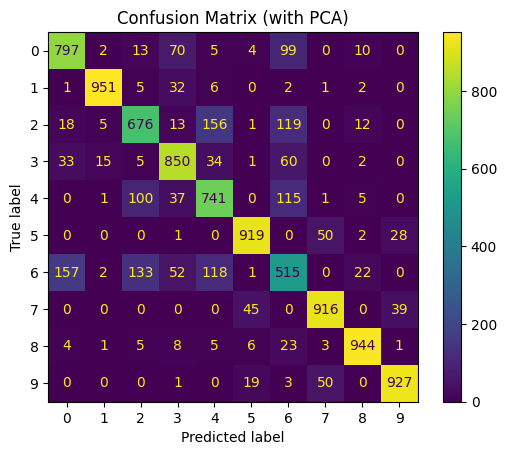

In [24]:
# Model Evaluation
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (with PCA):\n", conf_matrix)

# F1 Score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score (with PCA):", f1)


# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix (with PCA)')
plt.show()